## Bagging and Bootstraping :

<center><img src="../../../images/bagging_and_bootstraping.png" alt="error" width="1000"/></center>

---
## Boosting :

<center><img src="../../../images/boosting.png" alt="error" width="1000"/></center>

---

## Random Forest : 

<center><img src="../../../images/random_forest.png" alt="error" width="1000"/></center>

<center><img src="../../../images/random_forest_2.png" alt="error" width="1000"/></center>

---

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV , StratifiedKFold 
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix , classification_report

In [2]:
df = pd.read_csv('../../../datasets/Crop_Recommendation.csv')
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [3]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [6]:
df.shape

(2200, 8)

In [7]:
x = df.drop(columns='Crop')

In [8]:
y = df['Crop']

<Axes: xlabel='Crop'>

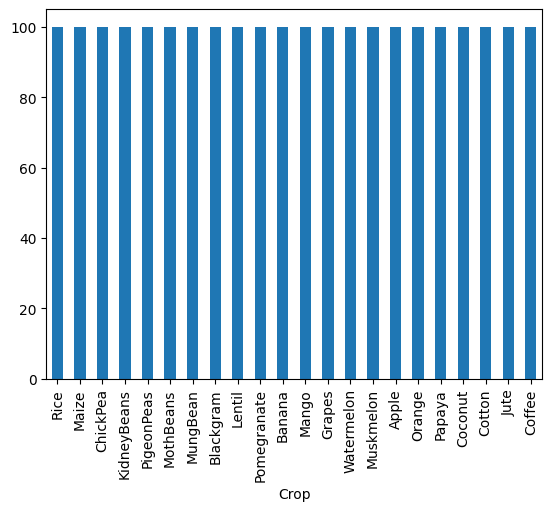

In [9]:
y.value_counts().plot(kind='bar')

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23,shuffle=True,stratify=y)

In [11]:
rfc = RandomForestClassifier()

In [12]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
y_pred = rfc.predict(x_test)

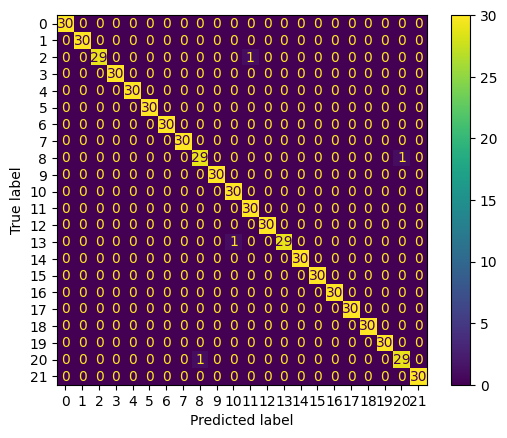

In [14]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        30
      Banana       1.00      1.00      1.00        30
   Blackgram       1.00      0.97      0.98        30
    ChickPea       1.00      1.00      1.00        30
     Coconut       1.00      1.00      1.00        30
      Coffee       1.00      1.00      1.00        30
      Cotton       1.00      1.00      1.00        30
      Grapes       1.00      1.00      1.00        30
        Jute       0.97      0.97      0.97        30
 KidneyBeans       1.00      1.00      1.00        30
      Lentil       0.97      1.00      0.98        30
       Maize       0.97      1.00      0.98        30
       Mango       1.00      1.00      1.00        30
   MothBeans       1.00      0.97      0.98        30
    MungBean       1.00      1.00      1.00        30
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        30
      Papaya       1.00    